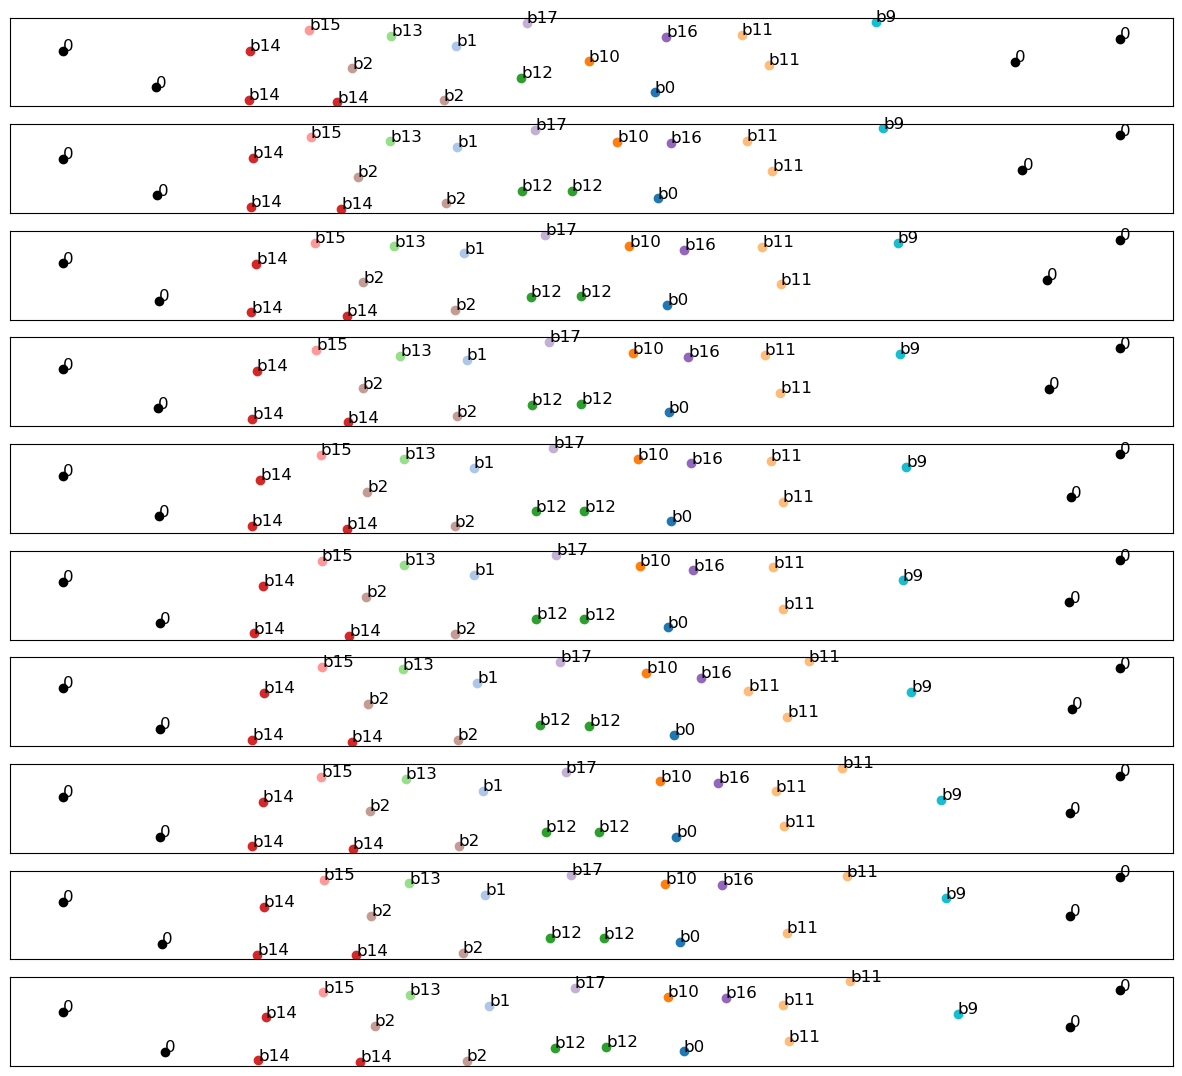

In [2]:
import ast
import matplotlib.cm as cm
import matplotlib.pyplot as plt

output_directory = "local_structure_modif_OUTPUT"

def read_2d_list_from_txt(output_directory, file_name):
    with open(f"{output_directory}/{file_name}", "r") as f:
        text = f.read()
    
    array_text = text.split('=')[1].strip()
    array = ast.literal_eval(array_text)
    return array

file_name = "2_centers_x_per_frame.txt"
centers_x_per_frame = read_2d_list_from_txt(output_directory, file_name)

file_name = "2centers_y_per_frame.txt"
centers_y_per_frame = read_2d_list_from_txt(output_directory, file_name)

file_name = "2tracking_names.txt"
trac_names_per_frame = read_2d_list_from_txt(output_directory, file_name)

unique_names = trac_names_per_frame[0]
color_map = {name: cm.tab20(i / len(unique_names)) for i, name in enumerate(unique_names)}

plt.figure(figsize=(15, 15))
for frame_id in range(10):
    plt.subplot(11, 1, frame_id+1)
    plt.xticks([])
    plt.yticks([]) 
    frame_id = frame_id +10
    for i in range(len(centers_x_per_frame[frame_id])):
        if trac_names_per_frame[frame_id][i] in color_map.keys():
            color = color_map[trac_names_per_frame[frame_id][i]]
        else:
            color = "black"
        plt.scatter(centers_x_per_frame[frame_id][i], centers_y_per_frame[frame_id][i], color=color)
        plt.text(centers_x_per_frame[frame_id][i], centers_y_per_frame[frame_id][i], trac_names_per_frame[frame_id][i], fontsize=12)

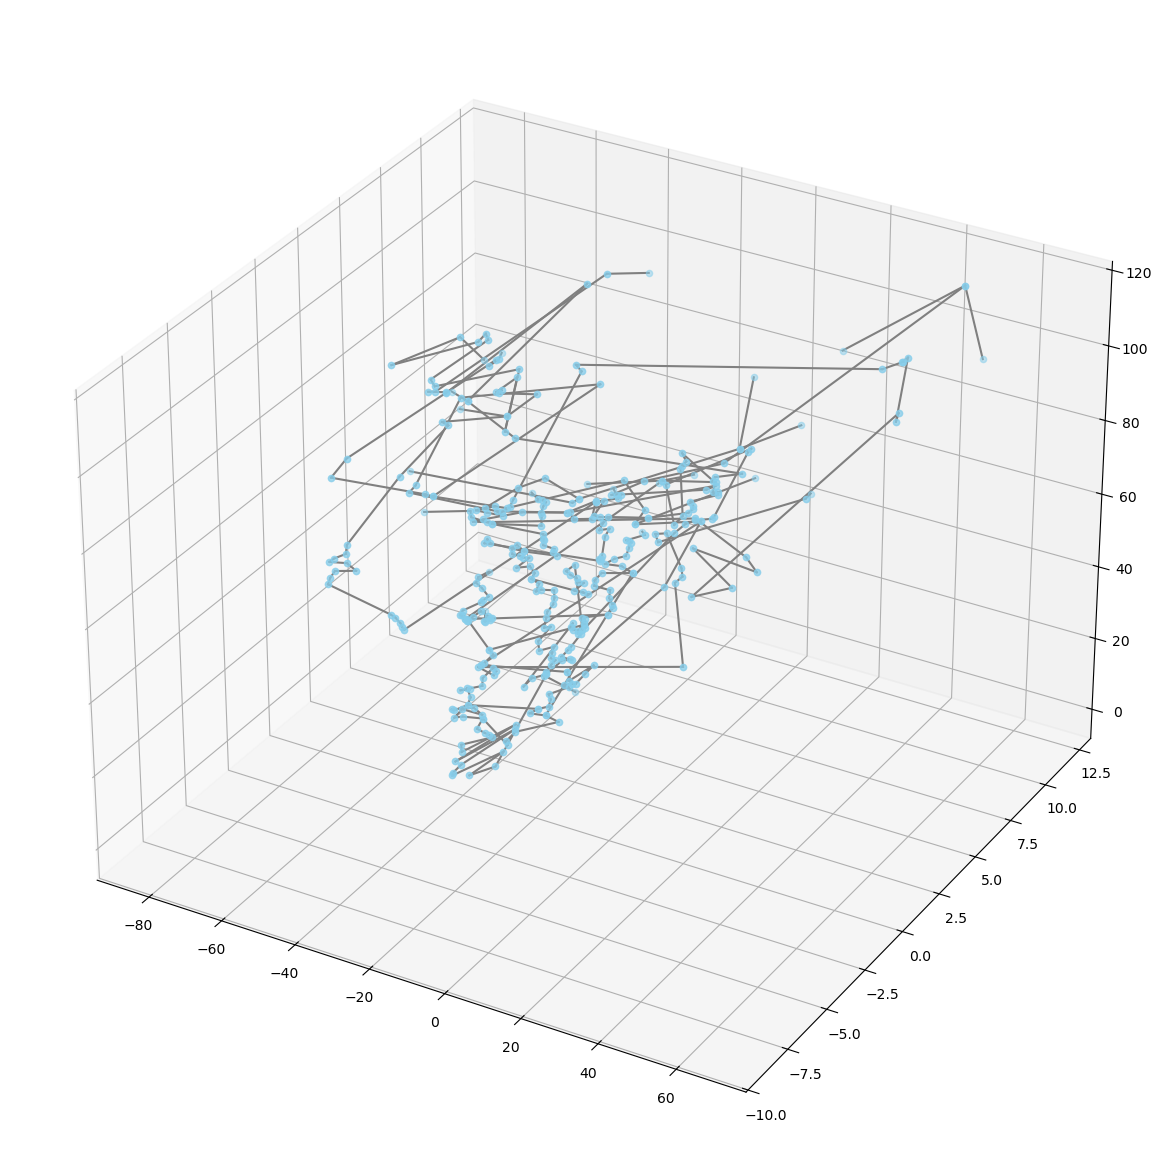

In [3]:
import ast
from mpl_toolkits.mplot3d import Axes3D

file_name = "2traces.txt"

# Read and safely evaluate the string as a Python object
with open(f"{output_directory}/{file_name}", "r") as file:
    content = file.read()
  #  print(content)
    
# Strip the "traces =" part if it's there
if content.startswith("traces ="):
    content = content[len("traces ="):].strip()

# Safely evaluate the literal list
traces = ast.literal_eval(content)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

name = "b17"
trace_ind = 7
for bact_ind in range(len(traces[trace_ind])):
    from_point = traces[trace_ind][bact_ind][0]
    to_point = traces[trace_ind][bact_ind][1]
    frames = traces[trace_ind][bact_ind][2]
    ax.scatter(from_point[0], from_point[1], frames[0], c='skyblue',  alpha = 0.5)
    ax.scatter(to_point[0], to_point[1], frames[1], c='skyblue',  alpha = 0.5)
    ax.plot([from_point[0], to_point[0]], [from_point[1], to_point[1]], [frames[0], frames[1]], c='grey')#, frames[1])
plt.show()


(array([74., 41., 27., 24., 18.,  5., 10.,  8.,  4.,  4.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([  6. ,  11.5,  17. ,  22.5,  28. ,  33.5,  39. ,  44.5,  50. ,
         55.5,  61. ,  66.5,  72. ,  77.5,  83. ,  88.5,  94. ,  99.5,
        105. , 110.5, 116. , 121.5, 127. , 132.5, 138. , 143.5, 149. ,
        154.5, 160. , 165.5, 171. ]),
 <BarContainer object of 30 artists>)

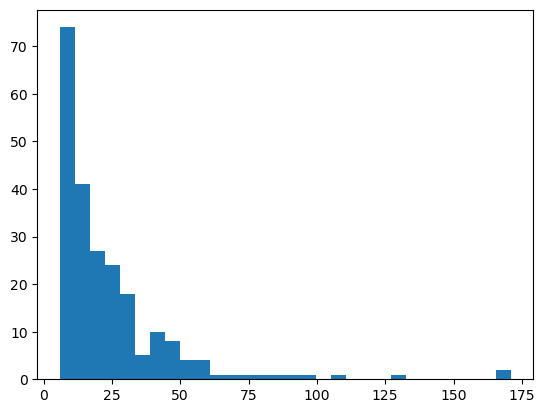

In [7]:
output_directory = "EXPER_DATA_OUTPUT"
file_name = "2X16_2_age_EXP.txt"

with open(f"{output_directory}/{file_name}", "r") as file:
    content = file.read()

# Extract the list part after the '=' sign
start = content.find('[')
end = content.find(']', start)
list_str = content[start+1:end]

# Convert to a list of integers
age_min = [int(x.strip()) for x in list_str.split(',')]

import matplotlib.pyplot as plt
plt.hist(age_min, bins = 30)


Text(0.5, 0, 'degrees')

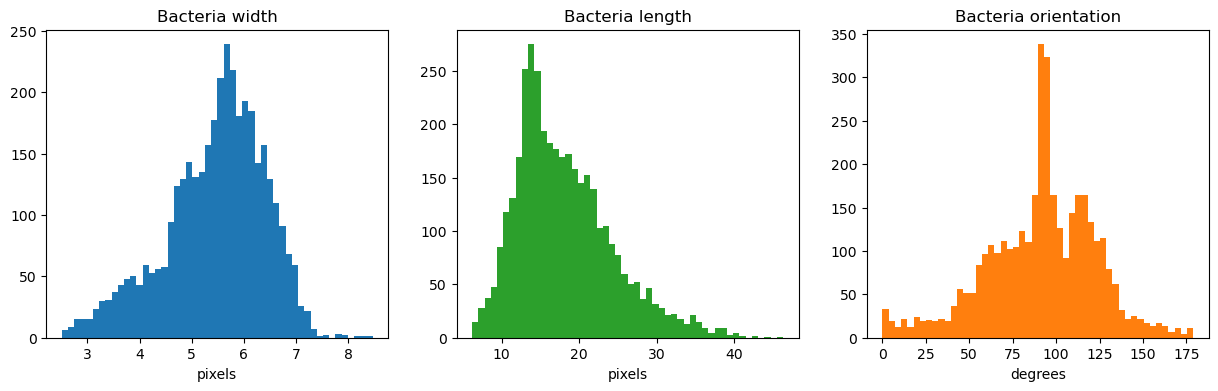

In [36]:
import ast

file_name = "2X16_2_wid_len_orient_EXP.txt"

# Read the file
with open(f"{output_directory}/{file_name}", "r") as f:
    lines = f.readlines()

# Dictionary to store all variables
variables = {}

# Parse each line
for line in lines:
    if '=' in line:
        var_name, var_value = line.split("=", 1)
        var_name = var_name.strip()
        var_value = var_value.strip()
        try:
            # Convert the string list to a Python list
            variables[var_name] = ast.literal_eval(var_value)
        except Exception as e:
            print(f"Could not parse line: {line}")
            print(f"Error: {e}")

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(variables["width"], bins = 50, color= "tab:blue")
plt.title("Bacteria width")
plt.xlabel("pixels")
plt.subplot(1, 3, 2)
plt.hist(variables["length"], bins = 50, color= "tab:green")
plt.title("Bacteria length")
plt.xlabel("pixels")
plt.subplot(1, 3, 3)
plt.hist(variables["orient"], bins = 50,  color= "tab:orange")
plt.title("Bacteria orientation")
plt.xlabel("degrees")


In [ ]:
file_name = "2X16_2_age_EXP.txt"

with open(f"{output_directory}/{file_name}", "r") as file:
    content = file.read()

# Extract the list part after the '=' sign
start = content.find('[')
end = content.find(']', start)
list_str = content[start+1:end]

# Convert to a list of integers
age_min = [int(x.strip()) for x in list_str.split(',')]

import matplotlib.pyplot as plt
plt.hist(age_min, bins = 30)

12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 11.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0


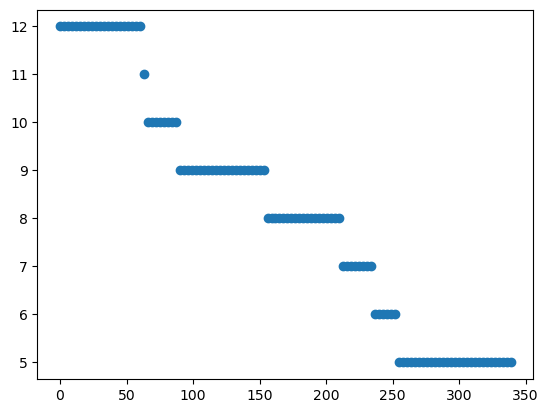

In [12]:
file_name = "2X16_2_numb_uniq_EXP.txt"
min_per_frame = 3

with open(f"{output_directory}/{file_name}", "r") as file:
    content = file.read()

# Extract the list part after the '=' sign
start = content.find('[')
end = content.find(']', start)
list_str = content[start+1:end]
print(list_str)

# Convert to a list of integers
num_uniq = [float(x.strip()) for x in list_str.split(',')]

import matplotlib.pyplot as plt
plt.scatter([i*min_per_frame for i in range(len(num_uniq))], num_uniq)